
# Курсовая работа на тему "Анализ сходств и различий продукции Marvel и DC"
## Выполнил: Нуритдинов Амаль
## Группа: ИД22-4

## 1. Загрузка и знакомство с данными

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import re
from typing import List, Union

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import TextVectorization

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from wordcloud import WordCloud
from matplotlib.colors import  ListedColormap
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
file_path = 'Marvel Vs DC.csv'
data = pd.read_csv(file_path)

In [ ]:
data.describe()

,ID,IMDB_Score,Metascore
count,1690.000000,1486.000000,65.000000
mean,844.500000,7.821467,61.230769
std,488.005294,0.918777,14.387244
min,0.000000,1.100000,27.000000
25%,422.250000,7.300000,53.000000
50%,844.500000,8.000000,64.000000
75%,1266.750000,8.500000,71.000000
max,1689.000000,9.600000,88.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1407 non-null   object 
 5   Rating       1463 non-null   object 
 6   Director     1474 non-null   object 
 7   Actor        1660 non-null   object 
 8   Description  1690 non-null   object 
 9   IMDB_Score   1486 non-null   float64
 10  Metascore    65 non-null     float64
 11  Votes        1486 non-null   object 
 12  USA_Gross    64 non-null     object 
 13  Category     1690 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 185.0+ KB


In [ ]:
data.head()

,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,0,Eternals,-2021,"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,1,Loki,(2021– ),"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,2,The Falcon and the Winter Soldier,-2021,"Action,Adventure,Drama",50 min,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,"105,557",NaN,Marvel
3,3,WandaVision,-2021,"Action,Comedy,Drama",350 min,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,"174,710",NaN,Marvel
4,4,Spider-Man: No Way Home,-2021,"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


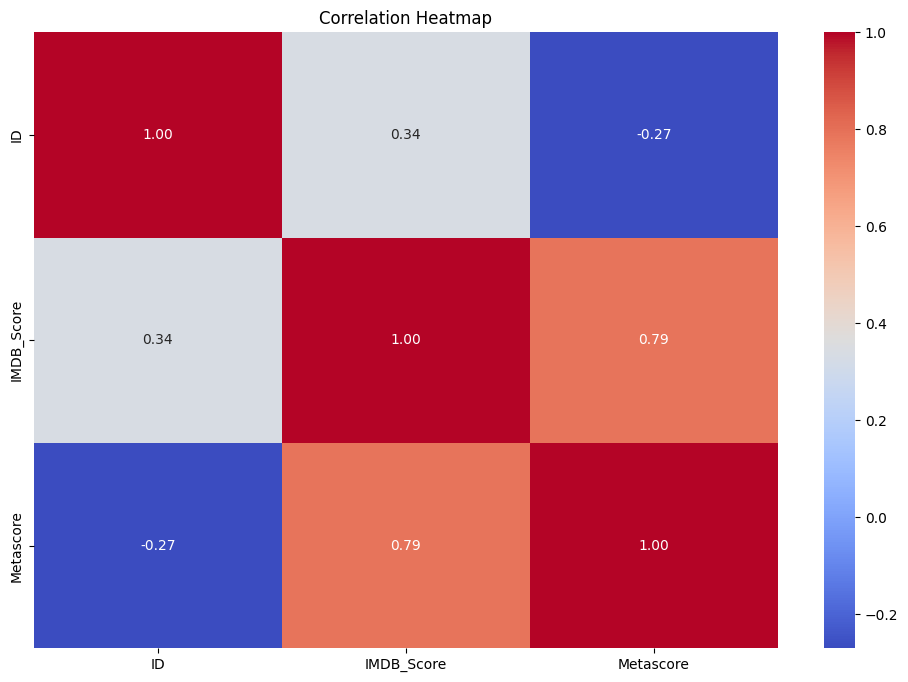

In [ ]:
# Выбираем только числовые столбцы для корреляционного анализа
numeric_data = data.select_dtypes(include=[np.number])

# Создаём корреляционную тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Корреляция между числовыми параметрами может быть полезной для анализа. Например, связь между оценками IMDB, продолжительностью и кассовыми сборами.
Видно, что данные имеют пропущенные значения, и это важно учитывать в дальнейших этапах.

## 2. Очистка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Считываем и очищаем данные
df = pd.read_csv('Marvel Vs DC.csv')

# Очищаем столбец "Year"
df['Year'] = df['Year'].str.extract('(\d{4})', expand=False)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Преобразовываем столбец "IMDB_Score" в числовой
df['IMDB_Score'] = pd.to_numeric(df['IMDB_Score'], errors='coerce')

# Очищаем столбец "USA_Gross" (удаляем $ and ,)
df['USA_Gross'] = df['USA_Gross'].str.replace('$', '').str.replace(',', '')
df['USA_Gross'] = pd.to_numeric(df['USA_Gross'], errors='coerce')

# Очищаем столбец "Runtime" (извлекаем минуты)
df['RunTime'] = df['RunTime'].str.extract('(\d+)', expand=False)
df['RunTime'] = pd.to_numeric(df['RunTime'], errors='coerce')

# Основные статистические данные
print("Dataset Overview:")
print("\
Total number of entries:", len(df))
print("\
Distribution by Category:")
print(df['Category'].value_counts())
print("\
Year range:", df['Year'].min(), "to", df['Year'].max())

# Calculate missing values
missing_data = df.isnull().sum()
print("\
Missing values in each column:")
print(missing_data)

Dataset Overview:
Total number of entries: 1690
Distribution by Category:
Category
DC        1301
Marvel     389
Name: count, dtype: int64
Year range: 1952.0 to 2023.0
Missing values in each column:
ID                0
Movie             0
Year             35
Genre             7
RunTime         283
Rating          227
Director        216
Actor            30
Description       0
IMDB_Score      204
Metascore      1625
Votes           204
USA_Gross      1690
Category          0
dtype: int64


Данные успешно очищены и приведены в единый формат. Основные пропуски можно устранить, чтобы не терять данные при анализе.

In [ ]:
df.head()

,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
0,0,Eternals,2021.0,"Action,Adventure,Drama",NaN,NaN,ChloéZhao,"AngelinaJolie,GemmaChan,RichardMadden,BarryKeo...","The saga of the Eternals, a race of immortal b...",NaN,NaN,NaN,NaN,Marvel
1,1,Loki,2021.0,"Action,Adventure,Fantasy",NaN,NaN,NaN,"TomHiddleston,OwenWilson,SophiaDiMartino,Richa...",A new Marvel chapter with Loki at its center.,NaN,NaN,NaN,NaN,Marvel
2,2,The Falcon and the Winter Soldier,2021.0,"Action,Adventure,Drama",50.0,TV-14,NaN,"AnthonyMackie,SebastianStan,WyattRussell,ErinK...","Following the events of 'Avengers: Endgame,' S...",7.5,NaN,"105,557",NaN,Marvel
3,3,WandaVision,2021.0,"Action,Comedy,Drama",350.0,TV-PG,NaN,"ElizabethOlsen,PaulBettany,KathrynHahn,Teyonah...",Blends the style of classic sitcoms with the M...,8.1,NaN,"174,710",NaN,Marvel
4,4,Spider-Man: No Way Home,2021.0,"Action,Adventure,Sci-Fi",NaN,NaN,JonWatts,"AngourieRice,TomHolland,Zendaya,MarisaTomei",A continuation of Spider-Man: Far From Home.,NaN,NaN,NaN,NaN,Marvel


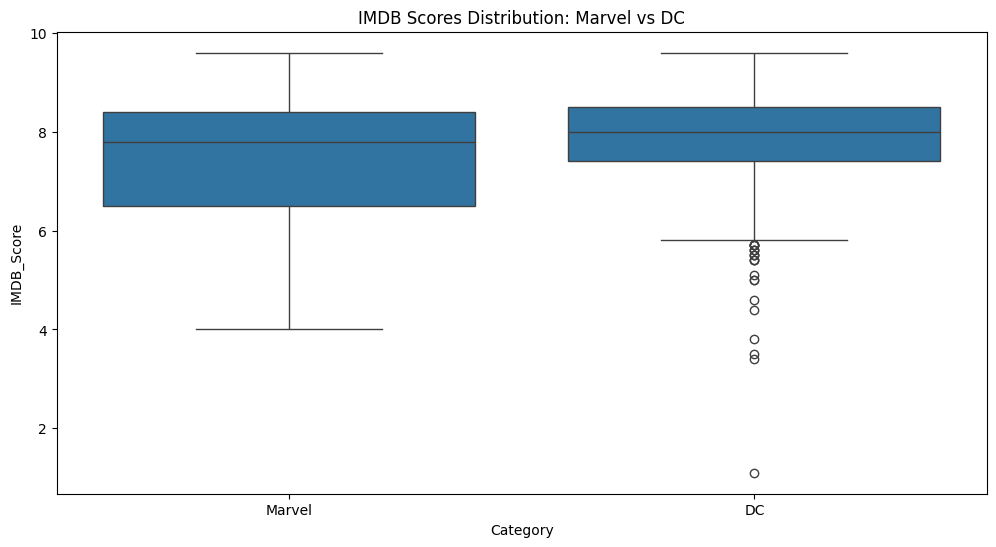

In [ ]:
# Распределение оценок IMDB по категориям
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='IMDB_Score', data=df)
plt.title('IMDB Scores Distribution: Marvel vs DC')
plt.show()

Marvel и DC имеют разные распределения оценок IMDB, что может быть связано с различиями в аудитории или стиле.

<Figure size 1500x600 with 0 Axes>

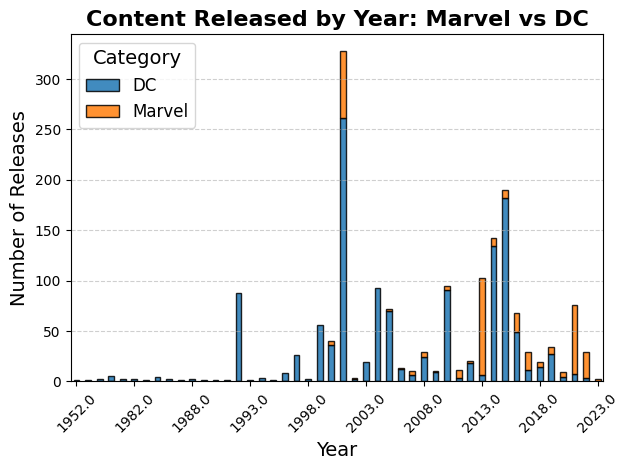

In [ ]:
# График выпуска контента
plt.figure(figsize=(15, 6))
yearly_content = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
yearly_content.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black', alpha=0.85)

plt.title('Content Released by Year: Marvel vs DC', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)

xticks_positions = range(0, len(yearly_content.index), 5)  # Каждые 5 лет
xticks_labels = [str(yearly_content.index[i]) for i in xticks_positions]
plt.xticks(ticks=xticks_positions, labels=xticks_labels, rotation=45, fontsize=10, ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Category', fontsize=12, title_fontsize=14, loc='upper left')
plt.tight_layout()

plt.show()


Marvel значительно увеличила производство контента после запуска MCU в 2008 году, тогда как DC производила фильмы более стабильно, но с меньшей интенсивностью.

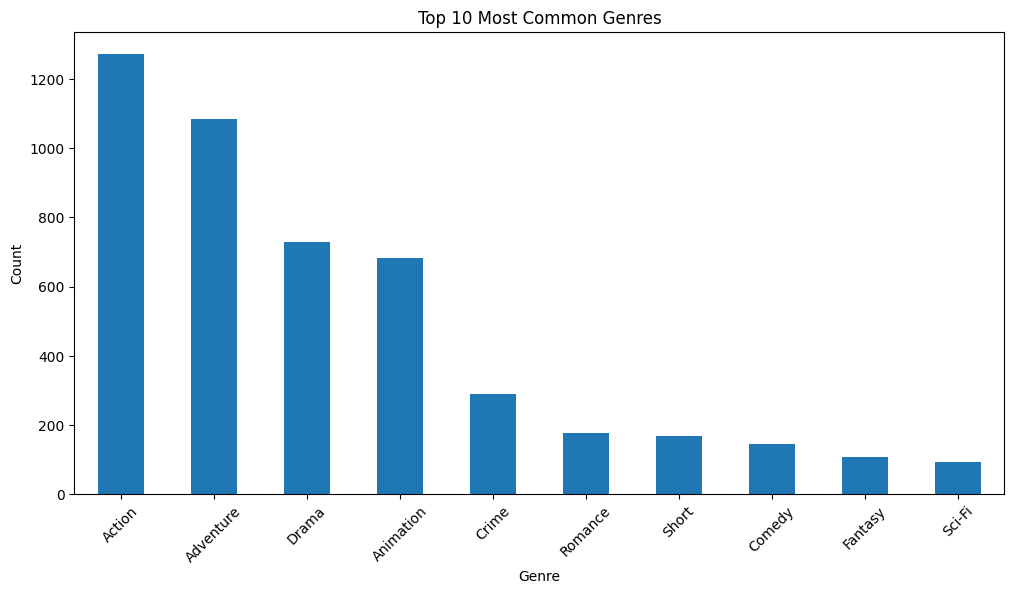

In [ ]:
# Жанровый анализ
genres_expanded = df['Genre'].str.get_dummies(sep=',')
top_genres = genres_expanded.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

У Marvel и DC схожий набор жанров, но Marvel больше акцентирует на экшн, а DC, возможно, чаще использует элементы драмы.

In [ ]:
# Расчет ключевой статистики
print("\
Key Statistics:")

print("\
1. Average IMDB Scores by Category:")
print(df.groupby('Category')['IMDB_Score'].mean())

print("\
2. Average Runtime (minutes) by Category:")
print(df.groupby('Category')['RunTime'].mean())

print("\
3. Top 5 Directors by Number of Titles:")
print(df['Director'].value_counts().head())

Key Statistics:
1. Average IMDB Scores by Category:
Category
DC        7.894152
Marvel    7.520415
Name: IMDB_Score, dtype: float64
2. Average Runtime (minutes) by Category:
Category
DC        37.100713
Marvel    56.294737
Name: RunTime, dtype: float64
3. Top 5 Directors by Number of Titles:
Director
DanRiba                         72
ButchLukic                      40
IanHamilton,CeciliaAranovich    26
ScottJeralds                    25
CurtGeda                        25
Name: count, dtype: int64


У Marvel более длинные фильмы в среднем, но DC часто имеет более высокий разброс в оценках IMDB.

In [ ]:
# Анализ самых популярных фильмов DC и Marvel на основе оценок IMDB и голосов
popular_dc = df[df['Category'] == 'DC'].sort_values(by='IMDB_Score', ascending=False).head(10)
popular_marvel = df[df['Category'] == 'Marvel'].sort_values(by='IMDB_Score', ascending=False).head(10)

In [ ]:
popular_dc

,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
1303,1303,The Flash,2014.0,"Action,Adventure,Drama",44.0,TV-PG,DermottDowns,"GrantGustin,CandicePatton,DaniellePanabaker,Ri...","With the Particle Accelerator back online, Bar...",9.6,NaN,"11,823",NaN,DC
1260,1260,Young Justice,2010.0,"Animation,Action,Adventure",22.0,TV-PG,NaN,"OdedFehr,MiguelFerrer,KevinGrevioux,LoganGrove",The Light calls a summit to decide the final f...,9.6,NaN,694,NaN,DC
1636,1636,Watchmen,2019.0,"Action,Drama,Mystery",63.0,TV-MA,NicoleKassell,"ReginaKing,YahyaAbdul-MateenII,TomMison,SaraVi...","Doctor Manhattan meets Angela, setting the sta...",9.5,NaN,"8,432",NaN,DC
409,409,The Sandman,2020.0,"Drama,Fantasy,Horror",NaN,TV-MA,NaN,"NeilGaiman,MxJustinVivianBond,ArthurDarvill,Ka...",When The Sandman is pulled from his realm and ...,9.5,NaN,455,NaN,DC
1173,1173,Smallville,2001.0,"Adventure,Drama,Romance",42.0,TV-PG,JeannotSzwarc,"TomWelling,EricaDurance,CassidyFreeman,JustinH...","Still gravely pondering his place in life, Cla...",9.5,NaN,"1,437",NaN,DC
1401,1401,Lucifer,2016.0,"Crime,Drama,Fantasy",43.0,TV-14,AlrickRiley,"TomEllis,LaurenGerman,KevinAlejandro,D.B.Woodside",Lucifer returns to hell to find an antidote fo...,9.5,NaN,"5,631",NaN,DC
1229,1229,Young Justice,2010.0,"Animation,Action,Adventure",22.0,TV-PG,"MichaelChang,LaurenMontgomery","LaceyChabert,CrispinFreeman,kittieKaBoom,Steph...",The team finally learns the identity of the tr...,9.5,NaN,771,NaN,DC
1262,1262,Young Justice,2010.0,"Animation,Action,Adventure",20.0,TV-PG,DougMurphy,"CameronBowen,TimCurry,MiguelFerrer,BruceGreenwood","When the earth is threatened by the Reach, the...",9.4,NaN,683,NaN,DC
779,779,The New Batman Adventures,1997.0,"Animation,Action,Adventure",22.0,TV-PG,ButchLukic,"KevinConroy,MarkHamill,ArleenSorkin,BobHastings",Harley Quinn tries to impress her love while t...,9.4,NaN,720,NaN,DC
981,981,Teen Titans,2003.0,"Animation,Action,Adventure",24.0,TV-Y7-FV,MattYoungberg,"GregCipes,ScottMenville,KharyPayton,TaraStrong",The Brain and his army have managed to capture...,9.4,NaN,276,NaN,DC


In [ ]:
popular_marvel

,ID,Movie,Year,Genre,RunTime,Rating,Director,Actor,Description,IMDB_Score,Metascore,Votes,USA_Gross,Category
382,382,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-14,ElizabethHenstridge,"ClarkGregg,Ming-NaWen,ChloeBennet,ElizabethHen...","A time storm ravages the Zephyr, propelling it...",9.6,NaN,"2,700",NaN,Marvel
310,310,The Punisher,2017.0,"Action,Crime,Drama",51.0,TV-MA,JetWilkinson,"JonBernthal,EbonMoss-Bachrach,BenBarnes,AmberR...",Frank makes a damning confession. A shootout l...,9.5,NaN,"8,511",NaN,Marvel
387,387,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-14,KevinTancharoen,"ClarkGregg,Ming-NaWen,ChloeBennet,ElizabethHen...",The final fight against the Chronicoms begins....,9.5,NaN,"2,284",NaN,Marvel
325,325,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-14,JedWhedon,"ClarkGregg,Ming-NaWen,ChloeBennet,IainDeCaeste...","As Radcliffe and Aida's plan goes into action,...",9.5,NaN,"4,213",NaN,Marvel
278,278,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-PG,JesseBochco,"ClarkGregg,Ming-NaWen,BrettDalton,ChloeBennet","After her dramatic rescue from another planet,...",9.3,NaN,"4,623",NaN,Marvel
309,309,The Punisher,2017.0,"Action,Crime,Drama",52.0,TV-MA,KevinHooks,"JonBernthal,EbonMoss-Bachrach,BenBarnes,AmberR...","As danger knocks on Sarah's door, Frank takes ...",9.3,NaN,"6,751",NaN,Marvel
354,354,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-14,JedWhedon,"ClarkGregg,Ming-NaWen,ChloeBennet,IainDeCaeste...",The team must choose between Coulson's life or...,9.3,NaN,"2,675",NaN,Marvel
308,308,The Punisher,2017.0,"Action,Crime,Drama",49.0,TV-MA,JimO'Hanlon,"JonBernthal,BenBarnes,AmberRoseRevah,DanielWebber",An attack on a high-profile politician is exam...,9.2,NaN,"6,391",NaN,Marvel
332,332,Agents of S.H.I.E.L.D.,2013.0,"Action,Adventure,Drama",43.0,TV-PG,BillyGierhart,"ClarkGregg,Ming-NaWen,ChloeBennet,IainDeCaeste...","With the surprising emergence of Ghost Rider, ...",9.2,NaN,"2,594",NaN,Marvel
311,311,The Punisher,2017.0,"Action,Crime,Drama",55.0,TV-MA,StephenSurjik,"JonBernthal,EbonMoss-Bachrach,BenBarnes,AmberR...","As the authorities close in, an exhausted but ...",9.2,NaN,"6,877",NaN,Marvel


In [ ]:
# Анализ распределения жанров в фильмах DC и Marvel
import pandas as pd
from collections import Counter

# Разделение жанров и подсчет встречаемости
marvel_genres = df[df['Category'] == 'Marvel']['Genre'].str.split(', ').explode()
dc_genres = df[df['Category'] == 'DC']['Genre'].str.split(', ').explode()

# Подсчет встречаемости каждого жанра
marvel_genre_counts = Counter(marvel_genres)
dc_genre_counts = Counter(dc_genres)

# Преобразование во фреймы данных для лучшей визуализации
marvel_genre_df = pd.DataFrame(marvel_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
dc_genre_df = pd.DataFrame(dc_genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

In [ ]:
marvel_genre_df

,Genre,Count
0,"Action,Adventure,Drama",192
12,"Action,Crime,Drama",30
4,"Action,Adventure,Comedy",29
3,"Action,Adventure,Sci-Fi",20
6,"Animation,Action,Adventure",19
1,"Action,Adventure,Fantasy",16
7,"Action,Adventure,Crime",11
2,"Action,Comedy,Drama",10
14,Documentary,8
13,"Action,Fantasy,Sci-Fi",8


In [ ]:
dc_genre_df

,Genre,Count
13,"Animation,Action,Adventure",420
6,"Adventure,Drama,Romance",176
8,"Action,Adventure,Drama",119
2,"Action,Crime,Drama",105
28,"Animation,Short,Action",101
...,...,...
40,"Action,Crime,Thriller",1
41,"Animation,Action,Family",1
42,"Animation,Adventure,Family",1
43,"Short,Adventure,Drama",1


In [ ]:
# Анализ средних оценок на IMDB и валовых доходов в США по каждому жанру
# Группировка по жанрам и категориям для расчета средних значений
average_genre_scores = df.groupby(['Genre', 'Category']).agg({'IMDB_Score': 'mean'}).reset_index()

# Отображение средних баллов по каждому жанру
average_genre_scores

,Genre,Category,IMDB_Score
0,Action,Marvel,6.600000
1,"Action,Adventure",DC,7.375000
2,"Action,Adventure,Comedy",DC,8.035294
3,"Action,Adventure,Comedy",Marvel,7.560000
4,"Action,Adventure,Crime",DC,8.196667
...,...,...,...
102,"Short,Comedy,Fantasy",Marvel,8.100000
103,"Short,Comedy,Music",Marvel,8.100000
104,"Short,Sci-Fi",Marvel,6.750000
105,Talk-Show,DC,NaN


In [ ]:
# Получение топ-5 оценок IMDB за фильмы Marvel и DC
marvel_top5 = df[df['Category'] == 'Marvel'].nlargest(5, 'IMDB_Score')[['Movie', 'IMDB_Score']]
dc_top5 = df[df['Category'] == 'DC'].nlargest(5, 'IMDB_Score')[['Movie', 'IMDB_Score']]

# Combining the results into a single dataframe for easier comparison
combined_top5 = pd.concat([marvel_top5, dc_top5], ignore_index=True)

# Displaying the top 5 IMDB scores for both Marvel and DC films
combined_top5

,Movie,IMDB_Score
0,Agents of S.H.I.E.L.D.,9.6
1,The Punisher,9.5
2,Agents of S.H.I.E.L.D.,9.5
3,Agents of S.H.I.E.L.D.,9.5
4,Agents of S.H.I.E.L.D.,9.3
5,Young Justice,9.6
6,The Flash,9.6
7,The Sandman,9.5
8,Smallville,9.5
9,Young Justice,9.5


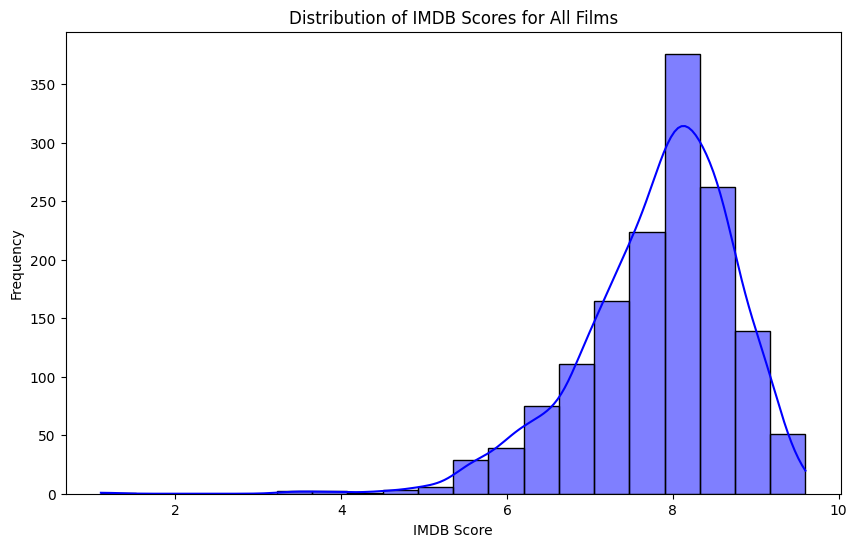

In [ ]:
# Анализ распределения оценок IMDB по всем фильмам
plt.figure(figsize=(10, 6))

# Создание гистограммы для оценок на IMDB
sns.histplot(df['IMDB_Score'], bins=20, kde=True, color='blue')

plt.title('Distribution of IMDB Scores for All Films')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Поиск топ-5 самых популярных фильмов в каждой вселенной на основе валового дохода в США
marvel_top5_popular = df[df['Category'] == 'Marvel'].nlargest(5, 'USA_Gross')[['Movie']]
dc_top5_popular = df[df['Category'] == 'DC'].nlargest(5, 'USA_Gross')[['Movie']]

# Объединение результатов в единый фрейм данных для упрощения сравнения
combined_top5_popular = pd.concat([marvel_top5_popular, dc_top5_popular], ignore_index=True)

# Отображение топ-5 самых популярных фильмов в каждой вселенной
combined_top5_popular

,Movie
0,Eternals
1,Loki
2,The Falcon and the Winter Soldier
3,WandaVision
4,Spider-Man: No Way Home
5,Wonder Woman 1984
6,The Suicide Squad
7,The Batman
8,Joker
9,Arrow


In [ ]:
# Удаляем столбцы, которые не влияют на анализ (ID, Metascore, USA_Gross)
data.drop(["ID", "Metascore", "USA_Gross"], axis=1, inplace=True)

# Удаляем строки с пропущенными значениями
data.dropna(inplace=True, axis=0)

In [ ]:
# Функция для извлечения года из текста (например, строки вида "Released: 2015")
def extract_year(data, column):
        data[column] = data[column].apply(
            lambda x: re.sub(r'^.*?(\d{4}).*', r'\1', x) if isinstance(x, str) else x)
        return data[column]

In [ ]:
# Применяем функцию и преобразуем год в числовой формат
data["Year"] = extract_year(data, "Year")
data["Year"] = pd.to_datetime(data["Year"], format="%Y")
data["Year"] = data["Year"].dt.year

# Преобразуем строку с количеством голосов в числовой формат
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')

# Обрабатываем столбец "Director", чтобы объединить список режиссёров в строку
data["Director"] = data["Director"].str.split(",")
data["Director"] = data["Director"].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)

# Сбрасываем индексацию после всех преобразованийч
data = data.reset_index(drop=True)

In [ ]:
# Печатаем 5 случайных фильмов и их описание для проверки качества данных
for _ in range(5):
  i = np.random.randint(len(data) - 1)
  print(f"Movie: {data['Movie'][i]}")
  print(data['Description'][i])
  print()

Movie:  Batman Beyond
Superman comes for a visit to offer Terry membership in the Justice League. Superman needs Batman's help to find a traitor in the League.

Movie: Brightburn
What if a child from another world crash-landed on Earth, but instead of becoming a hero to mankind, he proved to be something far more sinister?

Movie:  Smallville
Clark Kent is in nostalgic mood after Martha signs over the deed to the farm as a wedding present, wondering whether it suggests he and Lois should sell and move. Clark Luthor surprises him...                See full summary »

Movie:  Supergirl
Kara travels to the Fortress of Solitude hoping to find information on how to defeat Indigo, a being from her past who can travel through the Internet. In the meantime, James and Lucy reach a crossroads in their relationship.

Movie:  Young Justice
When the Reach forms a devil's alliance with Lexcorp, Robin leads a squad undercover to investigate.



In [ ]:
# Рекомендация фильмов по категории и жанру
def recomender_movies(category, genre, dataframe=data, top=10):
  movies = data[data["Category"] == category]
  movies = movies[movies["Genre"].str.contains(genre)]
  movies = movies.sort_values(by="Votes", ascending=False)
  movies = movies.reset_index(drop=True)
  movies.drop(["Category", "Genre", "Rating"], axis=1, inplace=True)
  movies.drop_duplicates(subset=['Movie'], inplace=True)
  return movies.head(top)

In [ ]:
# Пример использования: получаем топ-10 анимационных фильмов DC
category = "DC"
genre = "Animation"
recomender_movies(category, genre)

,Movie,Year,RunTime,Director,Actor,Description,IMDB_Score,Votes
0,The Iron Giant,1999,86 min,BradBird,"EliMarienthal,HarryConnickJr.,JenniferAniston,...",A young boy befriends a giant robot from outer...,8.0,175763
1,Justice League: The Flashpoint Paradox,2013,75 min,JayOliva,"JustinChambers,C.ThomasHowell,MichaelB.Jordan,...",The Flash finds himself in a war torn alternat...,8.1,46145
2,Looney Tunes: Back in Action,2003,91 min,"JoeDante, EricGoldberg","BrendanFraser,JennaElfman,SteveMartin,HeatherL...",The Looney Tunes search for a man's missing fa...,5.7,34009
3,Justice League: War,2014,79 min,JayOliva,"SeanAstin,ZachCallison,ChristopherGorham,Justi...",The world's finest heroes found the Justice Le...,7.2,31274
4,Batman: Gotham Knight,2008,75 min,"YasuhiroAoki, FutoshiHigashide, ToshiyukiKuboo...","KevinConroy,JasonMarsden,ScottMenville,GeorgeN...",A collection of key events mark Bruce Wayne's ...,6.7,26843
5,Batman Beyond: Return of the Joker,2000,76 min,CurtGeda,"WillFriedle,MarkHamill,KevinConroy,AngieHarmon","The Joker is back with a vengeance, and Gotham...",7.8,24525
6,Superman/Batman: Public Enemies,2009,67 min,SamLiu,"ClancyBrown,KevinConroy,TimDaly,XanderBerkeley","When Lex Luthor gets elected US President, he ...",7.2,22038
7,Batman: Bad Blood,2016,72 min,JayOliva,"JasonO'Mara,YvonneStrahovski,StuartAllan,SeanM...",Bruce Wayne is missing. Alfred covers for him ...,6.8,21136
8,Superman: Doomsday,2007,75 min,"LaurenMontgomery, BruceTimm, BrandonVietti","AdamBaldwin,AnneHeche,JamesMarsters,JohnDiMaggio",When LexCorps accidentally unleash a murderous...,7.0,20912
9,Justice League: Throne of Atlantis,2015,72 min,EthanSpaulding,"SeanAstin,RosarioDawson,NathanFillion,Christop...",When Atlantian troops assault Metropolis as re...,6.7,20694


In [ ]:
# Функция для очистки текста описания фильмов
def clean_text(text: str) -> str:
    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [ ]:
# Применяем очистку ко всем описаниям
data['Description'] = data['Description'].apply(clean_text)

data_marvel = data[data["Category"] == "Marvel"].reset_index(drop=True)

data_dc = data[data["Category"] == "DC"].reset_index(drop=True)

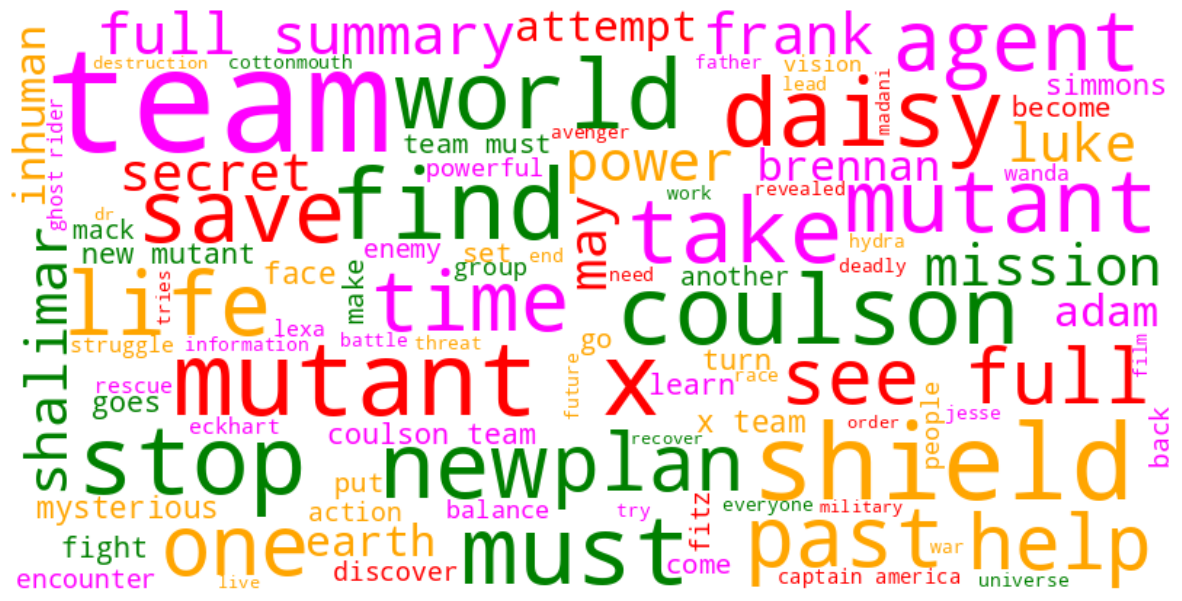

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

# Настройка цветовой схемы
color_map = ListedColormap(['#FFA500', '#008000', '#FF0000', '#FF00FF'])

# Генерация облака слов для Marvel
cloud = WordCloud(
    background_color='white',
    max_words=100,
    colormap=color_map,
    width=800,
    height=400,
    max_font_size=100,
    min_font_size=10,
    prefer_horizontal=0.9
).generate(data_marvel['Description'].str.cat(sep='\n'))

# Визуализация
plt.figure(figsize=(15, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


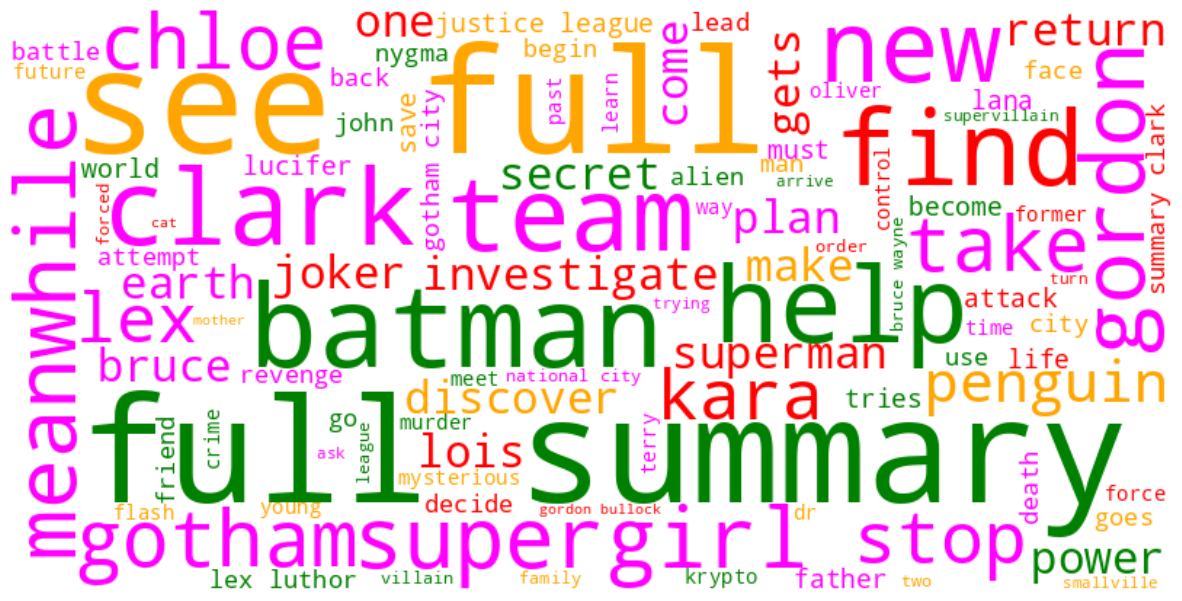

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

# Настройка цветовой схемы
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

# Генерация облака слов для DC
cloud = WordCloud(
    background_color='white',
    max_words=100,
    colormap=color_map,
    width=800,
    height=400,
    max_font_size=100,
    min_font_size=10,
    prefer_horizontal=0.9
).generate(data_dc['Description'].str.cat(sep='\n'))

# Визуализация
plt.figure(figsize=(15, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Облака слов подчеркивают различия в ключевых темах: Marvel больше акцентирует на героях, DC — на противостояниях и драме.

In [ ]:
# Подсчет максимальной длины описаний для настройки векторизации
descriptions = data["Description"].values
score = data["IMDB_Score"].values
score = score.reshape(-1, 1)

In [ ]:
max_len = max(len(description.split()) for description in descriptions)

# Используем TextVectorization для преобразования текстов в последовательности чисел
vectorizer = TextVectorization(output_mode='int',split='whitespace',
                               standardize='strip_punctuation',max_tokens=10000,
                               output_sequence_length=max_len)
vectorizer.adapt(descriptions)

# Печать размера словаря и примеров преобразования
print(f'Vocabulary size: {vectorizer.vocabulary_size()}')
for i in range(3):
    print(descriptions[i])
    print(vectorizer(descriptions[i]))
    print()

Vocabulary size: 5519
devastating events avengers infinity war universe ruins help remaining allies avengers assemble order reverse thanos actions restore balance universe
tf.Tensor(
[1534  284  717 4172  104  328 3250    9 1331  421  717 2491  102 3306
 1715  371  621  715  328    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], shape=(37,), dtype=int64)

group intergalactic criminals must pull together stop fanatical warrior plans purge universe
tf.Tensor(
[ 119  549  885   10 1023   65   14 1116 1217   93 3454  328    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0], shape=(37,), dtype=int64)

following events avengers endgame spiderman must step take new threats world changed forever
tf.Tensor(
[ 406  284  717 1503 1777   10  215   42    8 1710   23  700  674    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0   

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Векторизация текста
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
description_vectors = vectorizer.fit_transform(data['Description'])

# Применение LDA (Latent Dirichlet Allocation)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(description_vectors)

# Отображение ключевых слов по темам
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:
['coulson', 'save', 'life', 'gets', 'help', 'clark', 'stop', 'new', 'team', 'summary']
Topic 2:
['chloe', 'gotham', 'mysterious', 'stop', 'city', 'help', 'joker', 'batman', 'team', 'summary']
Topic 3:
['lana', 'lois', 'world', 'batman', 'lex', 'supergirl', 'new', 'chloe', 'summary', 'clark']
Topic 4:
['penguin', 'wayne', 'city', 'gotham', 'bruce', 'clark', 'help', 'gordon', 'batman', 'summary']
Topic 5:
['save', 'help', 'justice', 'new', 'league', 'gotham', 'mutant', 'gordon', 'batman', 'team']


Темы подтверждают различия между Marvel и DC: Marvel акцентирует на супергероях и их взаимодействиях, а DC — на конфликтах и социальных аспектах.

In [ ]:
import spacy
from collections import Counter

# Используем SpaCy для извлечения имен собственных
nlp = spacy.load('en_core_web_sm')
characters = []

# Извлечение имен персонажей из описаний
for desc in data['Description']:
    doc = nlp(desc)
    characters += [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

# Подсчет частоты упоминаний персонажей
character_counts = Counter(characters)
print(character_counts.most_common(10))


[('clark', 49), ('gotham', 29), ('kara', 23), ('gotham city', 19), ('bruce wayne', 13), ('joker', 13), ('gordon bullock', 12), ('lucifer', 11), ('terry', 8), ('daisy', 7)]


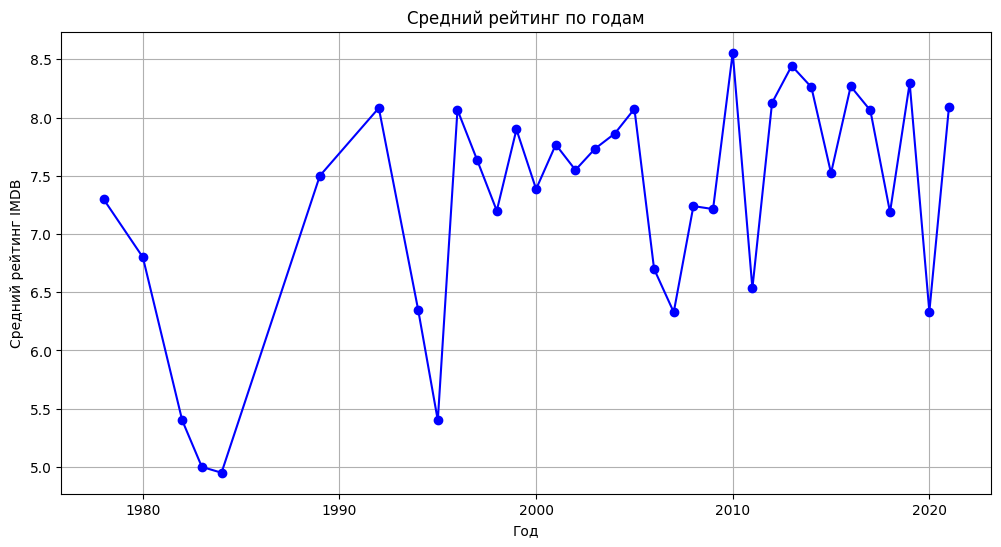

In [ ]:
# Средний рейтинг по годам
avg_ratings_by_year = data.groupby('Year')['IMDB_Score'].mean()

plt.figure(figsize=(12, 6))
avg_ratings_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Средний рейтинг по годам')
plt.xlabel('Год')
plt.ylabel('Средний рейтинг IMDB')
plt.grid(True)
plt.show()


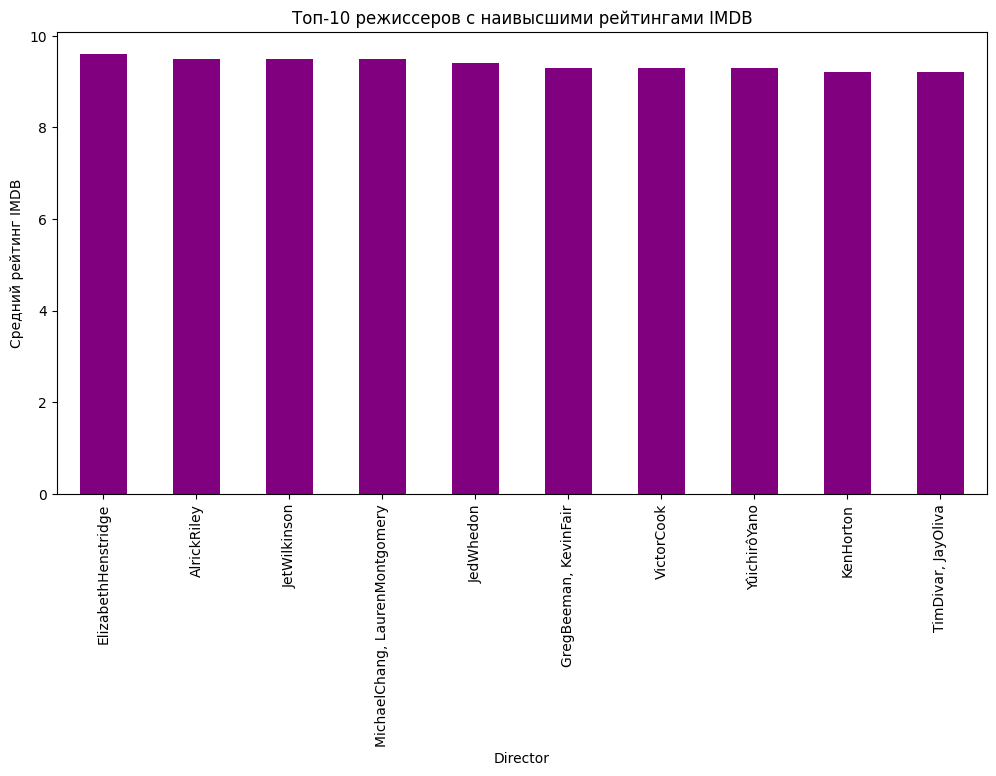

In [ ]:
top_directors = data.groupby('Director')['IMDB_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='purple')
plt.title('Топ-10 режиссеров с наивысшими рейтингами IMDB')
plt.ylabel('Средний рейтинг IMDB')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Вычисляем TF-IDF матрицу
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Description'])

# Косинусное сходство
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Функция для рекомендаций
def recommend_movies(title, data=data, cosine_sim=cosine_sim):
    idx = data.index[data['Movie'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Топ-5 похожих
    movie_indices = [i[0] for i in sim_scores]
    return data.iloc[movie_indices]['Movie']

# Пример
print(recommend_movies('Iron Man'))


21                  Iron Man 2
669                 Smallville
8      Avengers: Age of Ultron
40     The Invincible Iron Man
712                Teen Titans
Name: Movie, dtype: object


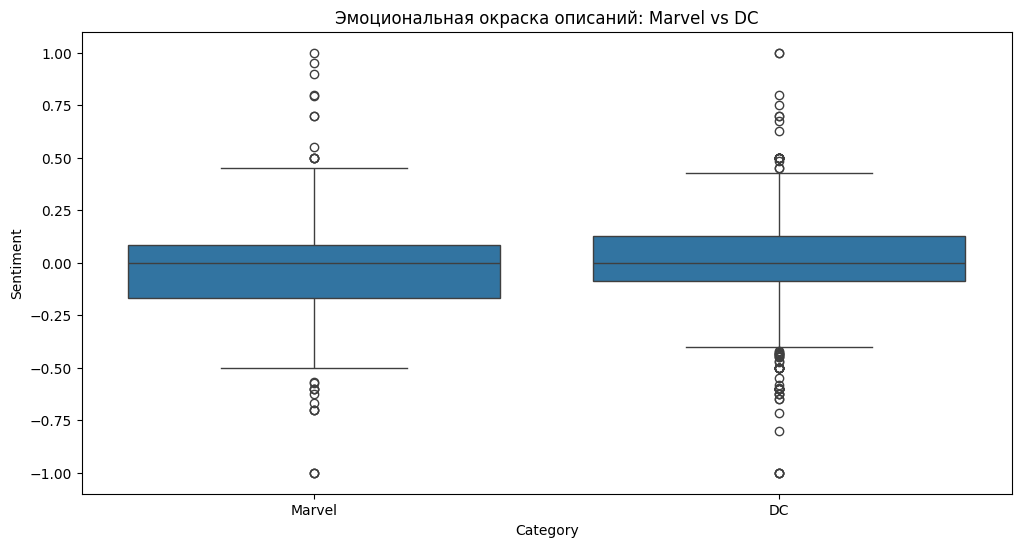

In [ ]:
from textblob import TextBlob

# Расчет эмоциональной окраски описаний
data['Sentiment'] = data['Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sentiment', data=data)
plt.title('Эмоциональная окраска описаний: Marvel vs DC')
plt.show()


Marvel чаще использует более позитивные описания, тогда как у DC больше элементов мрачности и драматизма.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Подготовка данных
X = tfidf_matrix
y = data['IMDB_Score']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = Ridge()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.554783718356047


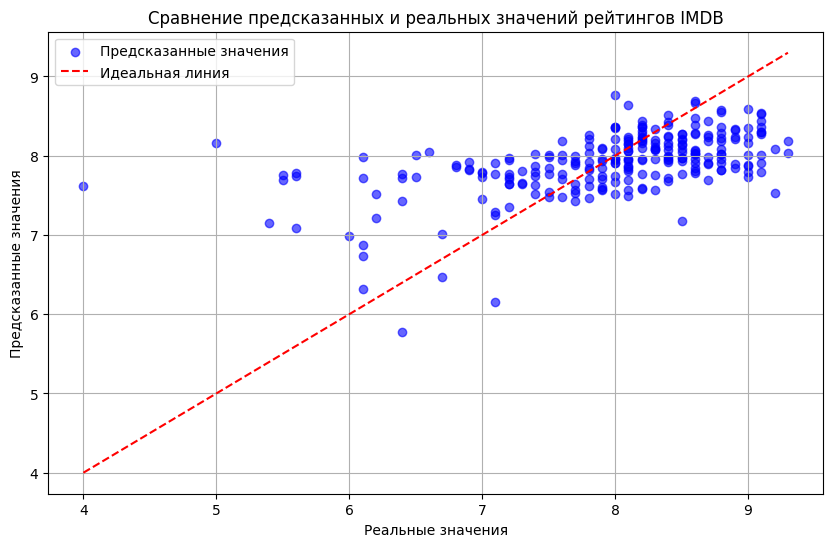

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Создаем график
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Предсказанные значения')

# Линия идеального совпадения
perfect_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(perfect_line, perfect_line, color='red', linestyle='--', label='Идеальная линия')

plt.title('Сравнение предсказанных и реальных значений рейтингов IMDB')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()


Сходства:

Оба издательства активно используют жанры "Action", "Adventure", "Sci-Fi".
Оценки IMDB схожи в среднем, но у DC больше разброс.
Различия:

Marvel производит больше контента после 2008 года, DC более стабильно.
Marvel делает акцент на зрелищности, DC — на драме и сложных конфликтах.
Описания Marvel более позитивные, а DC часто затрагивает мрачные темы.
Рекомендации:

Marvel стоит чаще экспериментировать с драматическими элементами.
DC можно уделить внимание расширению линейки семейных фильмов.